<a href="https://colab.research.google.com/github/muriloufu/Hydrocyclone_ANN/blob/main/Vieira_2006_HC_Melhorado_Eu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from google.colab import files
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import files

In [233]:
#selecao do dataset
path = 'https://github.com/muriloufu/Hydrocyclone_ANN/raw/main/Tese_LG_2006_01.xlsx'
df = pd.read_excel(path)
df

,Di,Do,L,Teta,RL,Eu,Etta
0,4.8,6.6,142,11.2,28.28,4493,65.18
1,4.8,6.6,142,17.8,29.30,4407,61.76
2,4.8,6.6,207,11.2,31.80,3997,72.47
3,4.8,6.6,207,17.8,31.20,3664,62.23
4,4.8,9.6,142,11.2,10.24,3697,54.06
5,4.8,9.6,142,17.8,10.50,3211,47.30
6,4.8,9.6,207,11.2,15.04,3257,61.52
7,4.8,9.6,207,17.8,17.16,3016,54.30
8,7.8,6.6,142,11.2,29.00,2416,74.59
9,7.8,6.6,142,17.8,33.00,1789,69.00


In [234]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x[i]=2*((x[i]-min_x)/(max_x-min_x))-1
    return x

In [235]:
# funcao retorna os dados a forma original - xi ISOLADO DA FUNCAO: NORMATIZA(X)
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        x[i]=((x[i]+1)/2)*(max_x-min_x)+min_x
    return x

In [236]:
DAT_OLD=[] #Criar um dataframe em branco
DAT_OLD=df.copy() #No dataframe em branco esta colocando os dados de df (dataframe que chamou no inicio)
DAT=Normatiza(df) #No dataframe DAT coloca o dataframe df normatizado

In [237]:
DAT #mostra o dataframe DAT que é o df normatizado

,Di,Do,L,Teta,RL,Eu,Etta
0,-6.250000e-01,-6.250000e-01,-0.549550,-0.6,0.117028,0.285241,0.215087
1,-6.250000e-01,-6.250000e-01,-0.549550,0.6,0.180186,0.253589,-0.017329
2,-6.250000e-01,-6.250000e-01,0.621622,-0.6,0.334985,0.102687,0.710499
3,-6.250000e-01,-6.250000e-01,0.621622,0.6,0.297833,-0.019875,0.014611
4,-6.250000e-01,6.250000e-01,-0.549550,-0.6,-1.000000,-0.007729,-0.540605
5,-6.250000e-01,6.250000e-01,-0.549550,0.6,-0.983901,-0.186603,-1.000000
6,-6.250000e-01,6.250000e-01,0.621622,-0.6,-0.702786,-0.169672,-0.033639
7,-6.250000e-01,6.250000e-01,0.621622,0.6,-0.571517,-0.258373,-0.524295
8,6.250000e-01,-6.250000e-01,-0.549550,-0.6,0.161610,-0.479205,0.854570
9,6.250000e-01,-6.250000e-01,-0.549550,0.6,0.409288,-0.709974,0.474686


In [238]:
#dividindo randomicamente os dados de DAT em treino e teste
train=DAT.sample(frac=0.8,random_state=None)
test=DAT.drop(train.index)

In [239]:
#Definindo as variaveis independentes
x_train=train.iloc[:,[0,1,2,3]]
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]

In [240]:
#variaveis independentes de treino e teste
print(x_train)
print (x_test)

              Di            Do         L  Teta
10  6.250000e-01 -6.250000e-01  0.621622  -0.6
13  6.250000e-01  6.250000e-01 -0.549550   0.6
6  -6.250000e-01  6.250000e-01  0.621622  -0.6
27  2.220446e-16 -2.220446e-16  0.027027   0.0
17  1.000000e+00 -2.220446e-16  0.027027   0.0
22  2.220446e-16 -2.220446e-16  0.027027  -1.0
24  2.220446e-16 -2.220446e-16  0.027027   0.0
12  6.250000e-01  6.250000e-01 -0.549550  -0.6
1  -6.250000e-01 -6.250000e-01 -0.549550   0.6
21  2.220446e-16 -2.220446e-16  1.000000   0.0
8   6.250000e-01 -6.250000e-01 -0.549550  -0.6
28  2.220446e-16 -2.220446e-16  0.027027   0.0
2  -6.250000e-01 -6.250000e-01  0.621622  -0.6
9   6.250000e-01 -6.250000e-01 -0.549550   0.6
7  -6.250000e-01  6.250000e-01  0.621622   0.6
20  2.220446e-16 -2.220446e-16 -1.000000   0.0
23  2.220446e-16 -2.220446e-16  0.027027   1.0
0  -6.250000e-01 -6.250000e-01 -0.549550  -0.6
4  -6.250000e-01  6.250000e-01 -0.549550  -0.6
5  -6.250000e-01  6.250000e-01 -0.549550   0.6
19  2.220446e

In [241]:
#definindo a variavel dependente RL
y_train=train.iloc[:,[5]]
y_test=test.iloc[:,[5]]
Y_OLD=DAT_OLD.iloc[:,[5]]
print(y_train)
print(y_test)

          Eu
10 -0.784321
13 -0.935223
6  -0.169672
27 -0.699301
17 -0.960250
22 -0.542142
24 -0.671329
12 -0.750460
1   0.253589
21 -0.807140
8  -0.479205
28 -0.642989
2   0.102687
9  -0.709974
7  -0.258373
20 -0.358484
23 -0.705558
0   0.285241
4  -0.007729
5  -0.186603
19 -0.753404
14 -0.974236
16  1.000000
          Eu
3  -0.019875
11 -0.828487
15 -1.000000
18 -0.313581
25 -0.667648
26 -0.673169


In [242]:
#define a rede neural
#nessa rede vao ser usados 3 camadas: Input + hidden + output
#o numero de neuronios da output eh 1, porque tem 1 resposta (FIE)
#o numero de neuronios na hidden eh arbitrario. O artigo fez 12 neuronios nessa camada
#funcao de ativicao eh a logistic, segundo o artigo
model = MLPRegressor(random_state=1,solver='lbfgs',activation='tanh', learning_rate = 'adaptive', alpha=1e-5, 
                     hidden_layer_sizes= tuple(100 for _ in range(10)))

In [243]:
#treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100),
             learning_rate='adaptive', learning_rate_init=0.001, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [244]:
#usa a rede neural para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [245]:
#transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [246]:
#Desnormatizar os dados obtidos da rede neural
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [247]:
#recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [248]:
#Resposta para fazer o grafico (Eu-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Eu'].copy()
resist_obs_train=train['Eu'].copy()

In [249]:
#Resposta para fazer o grafico (Eu-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Eu'].copy()
resist_obs_test=test['Eu'].copy()

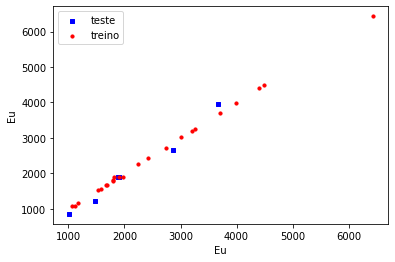

In [250]:
#expressa os dois dados em figura - EULER
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Eu')
plt.xlabel('Eu')
plt.show()

In [251]:
#checar a qualidade da regressao PARA TESTE
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 34976.92448694697
R^2 teste= 0.9555208344677967


In [252]:
#checar a qualidade da regressao PARA TREINO
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 622.858497967041
R^2 treino= 0.9996338289721466
